## Project: Books Recommender System

Nowadays, in this global world there is a vast number of things to select, where people might be lost. That is the case at the moment of choosing the next book to read. That’s why this project proposal is a book recommender system to help people choose better among a huge set of options.

What you'll find in this notebook is:

- Getting and loading data from this github [Repository](https://github.com/zygmuntz/goodbooks-10k)
- Data Exploration
- Cost function definition
- 2 approaches:
    - Matrix Factorization or Embedding Model
    - Restricted Boltzmann Machines
- Model Execution
- Results

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error


'''Keras and TensorFlow'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten
from keras.layers import dot
from keras.layers import BatchNormalization, Input, Lambda
from keras.losses import mse



Using TensorFlow backend.


### Loading Data

The dataset is composed by 3 .csv files provided by this guthub [repository](https://github.com/zygmuntz/goodbooks-10k)

- books.csv: contains metadata for each book. It includes book id, title, author, number of editions, publication year, language, average rating and others

- ratings.csv contains the most important variables for this project, user id, book id and book ratings

- To_read.csv, is the file that provides user IDs and the book IDs that the user has already read

In [2]:
# Loading data for book,csv file

books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
toread = pd.read_csv('to_read.csv')

### Data Exploration

**books.csv**

In [3]:
books.head(8)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...


In [4]:
# Columns and data types

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [5]:
# How many unique books and instances there are into this file

# Number of rows
print('Number of rows: {} '.format( books.book_id.count()))

# Unique books
print('Number of unique books: {} '.format(books.book_id.nunique()))

# Number of instances on books file
print('Number of instances: {}'. format(books.book_id.count()*len(books.columns)))

Number of rows: 10000 
Number of unique books: 10000 
Number of instances: 230000


**To read file**

In [6]:
toread.head(8)

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
5,34,483
6,34,8598
7,34,3581


In [7]:
toread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


In [8]:
# Printing number of rows, instances and unique books and unique users

tr_users = toread.user_id.nunique()
tr_books = toread.book_id.nunique()

print('Number of rows: {}'.format(toread.user_id.count()))
print('Number of instances: {}'.format(toread.user_id.count() * len(toread.columns)))
print('Number of unique users: {} '.format(tr_users))
print('Number of unique books: {} '.format(tr_books))

Number of rows: 912705
Number of instances: 1825410
Number of unique users: 48871 
Number of unique books: 9986 


**ratings.csv**

In [9]:
ratings.head(8)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4


In [10]:
# Getting info from dataset ratings (columns and data types)

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


In [11]:
#Let's verify number of instances and number of unique books and users have rated books there are into this file

n_users = ratings.user_id.nunique()
n_books = ratings.book_id.nunique()

print('Number of rows: {}'.format(ratings.user_id.count()))
print('Number of instances: {}'.format(ratings.book_id.count() * len(ratings.columns)))
print('Number of unique users: {} '.format(n_users))
print('Number of unique books: {} '.format(n_books))

Number of rows: 5976479
Number of instances: 17929437
Number of unique users: 53424 
Number of unique books: 10000 


**Ratings file is the most important file for this project. The recommender system is based on items ratings, let's see it in details. 1 is the lowest rate and 5 is the highest rate given a book**

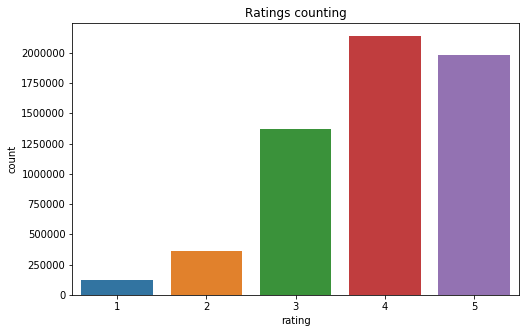

In [12]:
# Plotting the ratings counting

plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=ratings)
plt.title('Ratings counting')
plt.show()

**Let's visualize the average rating per user**

In [13]:
ratings.rating.describe()

count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

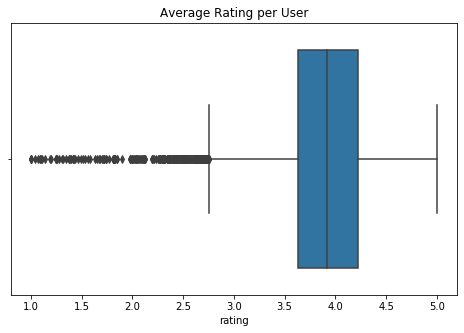

In [14]:
plt.figure(figsize=(8,5))
rating_avg_per_user = ratings[['user_id','rating']].groupby('user_id').mean().sort_values(by=['rating'], ascending=False)
sns.boxplot(x='rating', data=rating_avg_per_user)
plt.title('Average Rating per User')
plt.show()

### Data Cleaning

Null values in dataset should be seen in yellow


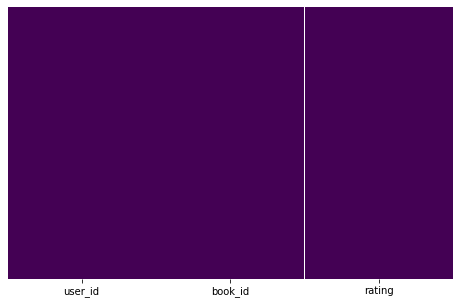

In [15]:
plt.figure(figsize=(8,5))
print('Null values in dataset should be seen in yellow')
sns.heatmap(ratings.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

_As we can see in the graphic above, cleaning is not needed since there are not null values_

### Data Size Reducing

In [16]:
print('Number of unique users: {} '.format(n_users))
print('Number of unique books: {} '.format(n_books))

Number of unique users: 53424 
Number of unique books: 10000 


#### Based on numbers above, let's reduce the complexity and size of this dataset and take the top one thousand most rated books. It represents the 10% of books the dataset contains

In [17]:
#To reduce complexity and size of this dataset

#variable with number of books and users there will be in the new dataset
records = 1000

bookIndex = ratings.groupby('book_id').count().sort_values(by='rating',ascending=False)[0:records].index
ratings_2 = ratings[ratings.book_id.isin(bookIndex)]

print('Number of unique books in dataset: {}'.format(ratings_2.book_id.nunique()))

Number of unique books in dataset: 1000


#### Let's take just 1000 of users


In [18]:
# Taking 1000 users
userIndex = ratings_2.groupby('user_id').count().sort_values(by='rating',ascending=False).sample(n=records,random_state=2020).index

# Creating the new dataset for working in this project
reducedRatings = ratings_2[ratings_2.user_id.isin(userIndex)]

print('Number of unique users in dataset: {} \n'.format(reducedRatings.user_id.nunique()))

reducedRatings.info()

Number of unique users in dataset: 1000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58851 entries, 846 to 5975819
Data columns (total 3 columns):
user_id    58851 non-null int64
book_id    58851 non-null int64
rating     58851 non-null int64
dtypes: int64(3)
memory usage: 1.8 MB


**Let's reindex book_id and user_id to a range from 1 to 1000**

In [19]:
#Reindexing book_id and user_id to a range from 1 to 1000

bookIDs = reducedRatings.book_id.unique()
bookDF = pd.DataFrame(data=bookIDs,columns=['originalBookId'])
bookDF['newBookId'] = bookDF.index+1


userIDs = reducedRatings.user_id.unique()
userDF = pd.DataFrame(data=userIDs, columns=['originalUserId'])
userDF['newUserId'] = userDF.index+1

reducedRatings = reducedRatings.merge(bookDF, left_on='book_id', right_on='originalBookId')
reducedRatings.drop(labels='originalBookId', axis=1, inplace=True)

reducedRatings = reducedRatings.merge(userDF, left_on='user_id',right_on='originalUserId')
reducedRatings.drop(labels='originalUserId', axis=1, inplace=True)


#### Exploring the reduced dataset

In [20]:
reducedRatings.head()

,user_id,book_id,rating,newBookId,newUserId
0,73,758,5,1,1
1,73,268,4,2,1
2,73,820,5,3,1
3,73,380,5,4,1
4,73,851,4,5,1


In [21]:
n_users = reducedRatings.user_id.nunique()
n_books = reducedRatings.book_id.nunique()
n_ratings = len(reducedRatings)

print('Number of unique users: {} '.format(n_users))
print('Number of unique books: {} '.format(n_books))
print('Number of ratings: {} '.format(n_ratings))


Number of unique users: 1000 
Number of unique books: 1000 
Number of ratings: 58851 


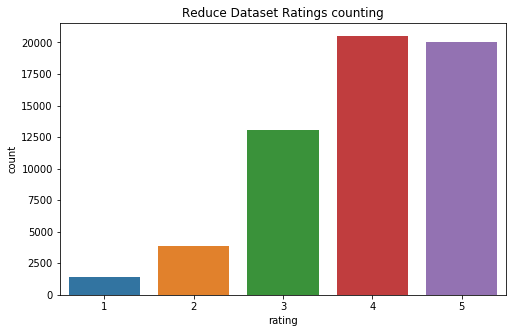

In [22]:
# Plotting the ratings counting

plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=reducedRatings)
plt.title('Reduce Dataset Ratings counting')
plt.show()

_Distribution in the graphic above is very similar to the original dataset_

**Let's generate a test set and validation set**

In [23]:
# Generating train, test and validation sets

X_train, X_test = train_test_split(reducedRatings, test_size = 0.10, shuffle=True, random_state=2020)

X_validation, X_test1 = train_test_split(reducedRatings, test_size = 0.50, shuffle=True, random_state=2020)


print('Train set size: {} '.format(len(X_train)))
print('Validation set size: {} '.format(len(X_validation)))
print('Test set size: {} '.format(len(X_test1)))

Train set size: 52965 
Validation set size: 29425 
Test set size: 29426 


## Cost Function Definition

I will use **Mean Squared Error (MSE)** as cost function to judge the goodness of the models. It measures the averaged square error between the predicted and actual values

<img src='mse.png' size=20%/ width="50%" height="50%">

In [24]:
# Creating a training rating matrix for train u x b, 
# where u are the users and the b are the books

ratings_train = np.zeros((n_users,n_books))

for row in X_train.itertuples():    
    ratings_train[row[5]-1, row[4]-1] = row[3]

#Calculating sparcity of train matrix
sparcity = float(len(ratings_train.nonzero()[0]))
sparcity /= (ratings_train.shape[0] * ratings_train.shape[1])
sparcity *= 100
print('Sparcity: {}'.format(round(sparcity,2)))

Sparcity: 5.3


In [25]:
# Creating a validation rating matrix for validation u x b, 
# where u are the users and the b are the books

ratings_validation = np.zeros((n_users,n_books))
for row in X_validation.itertuples():    
    ratings_validation[row[5]-1, row[4]-1] = row[3]


# Creating a test rating matrix for test u x b, 
# where u are the users and the b are the books

ratings_test = np.zeros((n_users,n_books))
for row in X_test.itertuples():    
    ratings_test[row[5]-1, row[4]-1] = row[3]


In [26]:
# Predicting an average rating of 3.5 for the validation set and calculating MSE

actual_validation = ratings_validation[ratings_validation.nonzero()].flatten()

pred_validation = np.zeros((len(X_validation),1))
pred_validation[pred_validation==0] = 3.5


mse = mean_squared_error(pred_validation,actual_validation)

print('Mean squared error using naive prediction: {}'.format(mse))

Mean squared error using naive prediction: 1.2081648258283773


In [27]:
# Predicting a user's rating for a given book based on that user's average rating for all other books

ratings_validation_prediction = np.zeros((n_users,n_books))
i = 0
for row in ratings_train:
    ratings_validation_prediction[i][ratings_validation_prediction[i]==0] = np.mean(row[row>0])
    i += 1
    
pred_validation = ratings_validation_prediction[ratings_validation.nonzero()].flatten()
user_average = mean_squared_error(pred_validation,actual_validation)

print('Mean squared error using user average: {}'.format(user_average))

Mean squared error using user average: 0.8434119929918782


In [28]:
# Predicting a users'rating for a given book based on average rating all other users gave that book

ratings_validation_prediction = np.zeros((n_users, n_books)).T
i = 0
for row in ratings_train.T:
    ratings_validation_prediction[i][ratings_validation_prediction[i]==0] = np.mean(row[row>0])
    i += 1
    
ratings_validation_prediction = ratings_validation_prediction.T
pred_validation = ratings_validation_prediction[ratings_validation.nonzero()].flatten()

book_average = mean_squared_error(pred_validation,actual_validation)
print('Mean squared error using book average: {}'.format(book_average))

Mean squared error using book average: 0.9427778575574443


## Approach 1: Latent Factor Based or Matrix Factorization



**Matrix factorization** is one of the most popular and succesful collaborative filtering algorithms today. It decomposes the user-item (in this case user-books) into a product of two lower dimensionality matrices.

In [58]:
# Defining this function to avoid repeat code and see results for different latent factors

def perform_MF(latent_factors):

    '''
    perform_MF: 
        Create an embedding model using Keras to perform the matrix factorization. 

    Args:
        Number of latent factors for the model

    Returns:
        A model with the number of latent factors given

    '''
    
    n_latent_factors = latent_factors

    # User dimensional vector    
    user_input = Input(shape=[1],name='user')
    user_embedding = Embedding(input_dim=n_users + 1, output_dim=n_latent_factors,
                              name='user_embedding')(user_input)
    user_vector = Flatten(name='flatten_users')(user_embedding)

    # Book dimensional vector
    book_input = Input(shape=[1],name='books')
    book_embedding = Embedding(input_dim=n_books + 1, output_dim=n_latent_factors,
                              name='book_embedding')(book_input)
    book_vector = Flatten(name='flatten_books')(book_embedding)
    
    
    # Generating the output vector to take the dot product of book vector and user vector
    product = dot([user_vector,book_vector], axes=1)
    
    # Creating an instance of the Model
    model = Model(inputs=[user_input,book_input], outputs=product)
    
    # Compiling the Neural Network, specifying 2 functions: a loss and an optimizer.
    # optimizer = adam  to reduce the cost function
    # cost function = MSE 
    model.compile('adam','mean_squared_error')
    
    # Training model with book and user vectors from the training dataset
    history = model.fit(x=[X_train.newUserId, X_train.newBookId],
                   y=X_train.rating, epochs=50,
                   validation_data=([X_validation.newUserId, 
                   X_validation.newBookId], X_validation.rating),
                   verbose=0)    
    


    return history

### One Latent Factor

In [30]:
# Calling perform_MF function to perform a matrix factorization with 1 latent factor
history = perform_MF(1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Minimum MSE:  0.7554328825945761


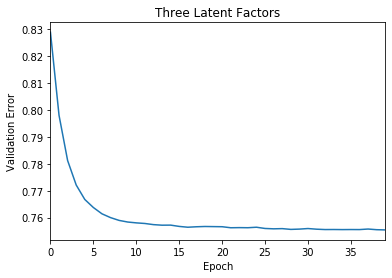

In [31]:
pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Validation Error')
plt.title('Three Latent Factors')

print('Minimum MSE: ',min(history.history['val_loss']))

### Three Latent Factor

In [32]:
# Calling perform_MF function to perform a matrix factorization with 1 latent factor

history = perform_MF(3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Minimum MSE:  0.6767922135177262


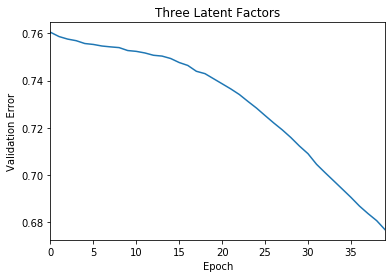

In [33]:
# PLotting results

pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Validation Error')
plt.title('Three Latent Factors')

print('Minimum MSE: ',min(history.history['val_loss']))

### Five Latent Factors

In [34]:
# Calling perform_MF function to perform a matrix factorization with 1 latent factor

history = perform_MF(5)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Minimum MSE:  0.59904223239513


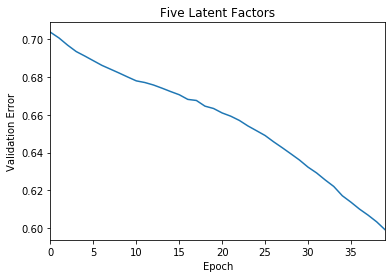

In [35]:
# PLotting results

pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Validation Error')
plt.title('Five Latent Factors')

print('Minimum MSE: ',min(history.history['val_loss']))

### Ten Factors Latent


In [36]:
# Calling perform_MF function to perform a matrix factorization with 1 latent factor

history = perform_MF(10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Minimum MSE:  0.3954966731444191


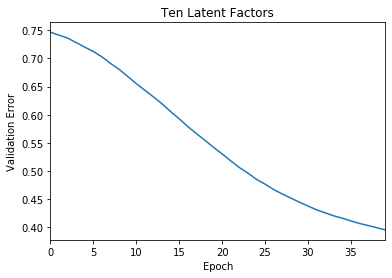

In [37]:
# PLotting results

pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Validation Error')
plt.title('Ten Latent Factors')

print('Minimum MSE: ',min(history.history['val_loss']))

## Creating Matrix Factorization or Embedding Model

In [59]:
# Creating the model with ten factor latent

n_latent_factors = 10

# User vector
user_input = Input(shape=[1],name='user')
user_embedding = Embedding(input_dim=n_users + 1, output_dim=n_latent_factors, 
                           name='user_embedding')(user_input)
user_vector = Flatten(name='flatten_users')(user_embedding)


# Book vector
book_input = Input(shape=[1],name='books')
book_embedding = Embedding(input_dim=n_books + 1, output_dim=n_latent_factors,
                          name='book_embedding')(book_input)
book_vector = Flatten(name='flatten_books')(book_embedding)


# Generating the output vector to take the dot product of book vector and user vector
product = dot([user_vector,book_vector], axes=1)

# Creating the model
model = Model(inputs=[user_input,book_input], outputs=product)
model.compile('adam','mean_squared_error', metrics=['accuracy'])

# Training the model
history = model.fit(x=[X_train.newUserId, X_train.newBookId],
               y=X_train.rating, 
               epochs=100,
               validation_data=([X_validation.newUserId, X_validation.newBookId], 
               X_validation.rating),
               verbose=0)    

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
books (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 10)        10010       user[0][0]                       
__________________________________________________________________________________________________
book_embedding (Embedding)      (None, 1, 10)        10010       books[0][0]                      
____________________________________________________________________________________________

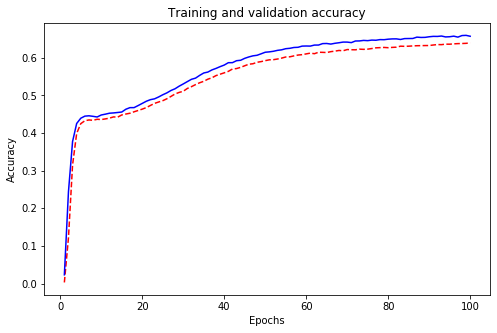

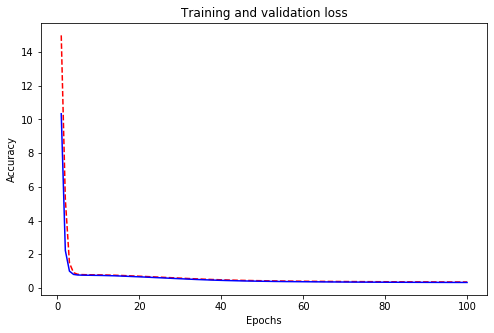

In [60]:
#Plotting training vs validation accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,5))
epochs   = range(1,len(acc)+1,1)

plt.plot(epochs,acc, 'r--', label='Training acc'  )
plt.plot(epochs, val_acc,  'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()


plt.figure(figsize=(8,5))
plt.plot(epochs,loss,'r--')
plt.plot(epochs, val_loss,'b')
plt.title('Training and validation loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

Minimum MSE:  0.33


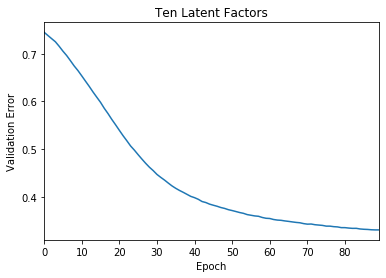

In [61]:
# PLotting results

pd.Series(history.history['val_loss'][10:]).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Validation Error')
plt.title('Ten Latent Factors')

print('Minimum MSE: ',round(min(history.history['val_loss']),2))
mse_embedding = min(history.history['val_loss'])



In [62]:
# Creating a DataFrame for saving results from models
results = pd.DataFrame(columns = ['Model' , 'MSE'])

# Adding result to results dataframe
results = results.append({'Model': 'Matrix Factorization', 
                          'MSE': mse_embedding},
                         ignore_index=True)


### Executing the model and create recommendations for a mock user 

In [63]:
# Creating a dataset for making recommendations from user from 1 to 1000

user_number = 187

book_data = np.array(list(set(reducedRatings.newBookId)))
user_data = np.array([user_number for i in range(len(book_data))])

predictions = model.predict([user_data, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_newbookids = (-predictions).argsort()[:5]
recommendedBookIds = reducedRatings[reducedRatings['newBookId'].isin(recommended_newbookids)]['book_id'].unique()


print('Recommended books for user: {}'.format(user_number))
print(books[books['book_id'].isin(recommendedBookIds)][['original_title','authors']])

Recommended books for user: 187
            original_title                           authors
491   Speaker for the Dead                  Orson Scott Card
589      David Copperfield  Charles Dickens, Jeremy Tambling
593  Because of Winn-Dixie      Kate DiCamillo, Chris Sheban
639                   Prey                  Michael Crichton
749               Obsidian            Jennifer L. Armentrout


## Approach 2: Restricted Boltzmann Machines

**Restricted Boltzmann Machines (RBM)** consists of a neural network with an input layer (also referred to as the visible layer) and a single hidden layer. The connections among neurons in the same layer are restricted. Neurons in the visible layer communicate with the hidden layer, and then the hidden layer passes back information to the visible layer, going back and forth several times.

The code below is the definition of the RBM class and its functions.

For a better understading of the code, please take a look of this [list of variables](list_of_variables.ipynb)

In [43]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


# Defining RBM Class

class RBM(object):
    
    def __init__(self, input_size, output_size, learning_rate,epochs, batchsize):
    
        '''
        Function to initialize the attributes of a RBM class
        
        Args:
        
            input_size (int): number of books
            output size (int)  
            learning_rate (float)
            epochs (int) : number of iterations
            batch_size (int) 
        
        '''   
        #Defining hyperparameters        
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        
        #Initializing weights and biases using zero matrices
        self.w = np.zeros([input_size,output_size],'float')
        self.hb = np.zeros([output_size], 'float')
        self.vb = np.zeros([input_size], 'float')   
    
      
    def prob_h_given_v(self, visible, w, hb):
        
        '''
        Forward pass (activation function)
        
        Args:
            visible : input layer
            w  : weight
            hb  : bias vector added at the hidden layer to ensure at least some of the neurons fire

        Returns:
             The result of appying sigmoid function to the result of multiplied visible by w and added to hb
        
        '''
        
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

 
    def prob_v_given_h(self, hidden, w, vb):  
        
        '''
        Backward pass (Activation function) 
        
        Args:
        
            hidden : input layer
            w  : weight
            vb  : bias vector added at the visible layer to ensure at least some of the neurons fire

        Returns:
            The result of appying sigmoid function to the result of multiplied hidden by w and added to vb
        
        '''
    
        vb = tf.cast(vb, tf.float32)
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)

    
    # Sampling Function (Gibss Sampling)
    def sample_prob(self, probs):
        
        '''
        sample_prob (Activation function) 
        
        Args:
        
            probs : The result of multiplied hidden o visible by w and added to visible or hidden bias
        
        Returns:
            A sample of probs, generated stochastically (randomly)
        
        '''      
        
        return tf.nn.relu(tf.sign(probs - tf.random_uniform(tf.shape(probs))))
    

    
    # Output Function
    def rbm_output(self, X):
         
        '''
        sample_prob (Output function) 
        
        Args:
        
            X: Rating matrix as input
        
        Returns:
            output X
            Reconstructed X
            Hidden X
        
        '''
        
        input_X = tf.constant(X)
        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)
        out = tf.nn.sigmoid(tf.matmul(input_X, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(input_X, _w, _hb))        
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            return sess.run(out),sess.run(visibleGen),sess.run(hiddenGen)
        
        

    # Train function    
    def train(self, X, user=1):
    
        # Creating placeholders for weight matrix, hidden bias vector and visible bias vector
        _w = tf.placeholder('float', [self._input_size, self._output_size])
        _hb = tf.placeholder('float',[self._output_size])
        _vb = tf.placeholder('float',[self._input_size])

        # Initializing values in zeros for variables above, to hold previous values
        prv_w = np.zeros([self._input_size,self._output_size], 'float')
        prv_hb = np.zeros([self._output_size],'float')
        prv_vb = np.zeros([self._input_size],float)

        # Initializing values in zeros for variables above, to hold current values
        cur_w = np.zeros([self._input_size,self._output_size], 'float')
        cur_hb = np.zeros([self._output_size],'float')
        cur_vb = np.zeros([self._input_size],float)

        # Creating placeholder for visible layer
        v0 = tf.placeholder('float',[None, self._input_size])
        h0 = self.sample_prob(self.prob_h_given_v(v0, _w, _hb))

        # Setting the output forward pass (v1) and adding the visible bias vector
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)

        # Defining the error as MSE
        positive_grad = tf.matmul(tf.transpose(v0), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)


        # Create methods to update the weights and biases
        update_w = _w + self.learning_rate * (positive_grad - negative_grad)/tf.to_float(tf.shape(v0)[0])
        update_vb = _vb + self.learning_rate * tf.reduce_mean(v0 - v1,0)
        update_hb = _hb + self.learning_rate * tf.reduce_mean(h0 - h1,0)
        
        
        err = tf.reduce_mean(tf.square(v0 - v1))        
        error_list = []
        
        
        # Initializing the TensorFlow Session with defined variables 
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for epoch in range(self.epochs):

                for start, end in zip(range(0, len(X),
                    self.batchsize),range(self.batchsize,len(X), self.batchsize)):

                    batch = X[start:end]
                    
                    cur_w = sess.run(update_w, feed_dict={
                        v0 : batch,
                        _w : prv_w,
                        _hb : prv_hb,
                        _vb : prv_vb})
                    
                    cur_hb = sess.run(update_hb, feed_dict={
                        v0 : batch,
                        _w : prv_w,
                        _hb : prv_hb,
                        _vb : prv_vb})
                    
                    cur_vb = sess.run(update_vb, feed_dict={
                        v0 : batch,
                        _w : prv_w,
                        _hb : prv_hb,
                        _vb : prv_vb})
                    
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                    
                    error = sess.run(err, feed_dict={v0:X, _w:cur_w, _vb:cur_vb, _hb: cur_hb})
                    error_list.append(error)
                    
                    print('Epoch: {} ,reconstruction error: {} '.format(epoch, error))

           
            
            # Feeding the User
            inputUser = [X[user]]
            hh0 = tf.nn.sigmoid(tf.matmul(v0,_w) + _hb)
            vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(_w)) + _vb)
            feed = sess.run(hh0, feed_dict={v0: inputUser, _w: prv_w, _hb: prv_hb})
            rec = sess.run(vv1, feed_dict={hh0: feed, _w: prv_w, _vb: prv_vb})

            self.w = prv_w
            self.hb = prv_hb
            self_vb = prv_vb  
            
            return error_list,rec


    # Obtaining recommendation for an user    
    def recommendedBooks(self, ratings, books, to_read, rec, user):
        
        
        # Creating recommendation score for books in our data
        num_rows = records
        temp = ratings.sort_values(by=['user_id'], ascending=True)
        ratings = temp.iloc[:num_rows, :]
        ratings['Recommendation_Score'] = rec[0]

        
        # Finding mock user's user_id from the data
        cur_user_id = ratings.iloc[user]['user_id']
        

        # Finding books the user has read before
        read_books = ratings[ratings['user_id'] == cur_user_id]['book_id']
        read_books

        # Converting the pandas object into a list
        read_books_id = read_books.tolist()

        # Getting book names and authors for the books already read by the user
        read_books_names = []
        read_books_authors = []
        for book in read_books_id:
            read_books_names.append(
                books[books['book_id'] == book]['original_title'].tolist()[0])
            read_books_authors.append(
                books[books['book_id'] == book]['authors'].tolist()[0])

        # Finding all books the mock user has 'not' read before using the to_read data
        unread_books = to_read[to_read['user_id'] == cur_user_id]['book_id']
        unread_books_id = unread_books.tolist()

        # Extracting  ratings of all the unread books from ratings dataframe
        unread_with_score = ratings[ratings['book_id'].isin(unread_books_id)]

        # Grouping the unread data on book id and taking the mean of the recommendation scores for each book_id
        grouped_unread = unread_with_score.groupby('book_id', as_index=False)[
            'Recommendation_Score'].mean()

        # Getting the names and authors of the unread books
        unread_books_names = []
        unread_books_authors = []
        unread_books_scores = []
        for book in grouped_unread['book_id']:
            unread_books_names.append(
                books[books['book_id'] == book]['original_title'].tolist()[0])
            unread_books_authors.append(
                books[books['book_id'] == book]['authors'].tolist()[0])
            unread_books_scores.append(
                grouped_unread[grouped_unread['book_id'] == book]['Recommendation_Score'].tolist()[0])

        # Creating a data frame for unread books with their names, authors and recommendation scores
        unread_books_with_scores = pd.DataFrame({
            'book_name': unread_books_names,
            'book_authors': unread_books_authors,
            'score': unread_books_scores
        })

        # Creating a data frame for read books with the names and authors
        read_books_with_names = pd.DataFrame({
            'book_name': read_books_names,
            'book_authors': read_books_authors
        })

        return unread_books_with_scores, read_books_with_names

Instructions for updating:
non-resource variables are not supported in the long term


In [53]:
# Training the model

inputX = ratings_train
inputX = inputX.astype(np.float32)

# Parameters: input_size, output_size, learning_rate, epochs, batchsize
# records variable was set above at the moment dataset were reduced to 1000 unique books and 1000 unique users

rbm = RBM(records,records,0.3,230,200)

In [54]:
# Train RBM model
err,rec = rbm.train(inputX,187)

Epoch: 0 ,reconstruction error: 0.8912249803543091 
Epoch: 0 ,reconstruction error: 0.9646580219268799 
Epoch: 0 ,reconstruction error: 0.9547669887542725 
Epoch: 0 ,reconstruction error: 0.9146829843521118 
Epoch: 1 ,reconstruction error: 0.8980069756507874 
Epoch: 1 ,reconstruction error: 0.8957920074462891 
Epoch: 1 ,reconstruction error: 0.8932340145111084 
Epoch: 1 ,reconstruction error: 0.8787590265274048 
Epoch: 2 ,reconstruction error: 0.8868169784545898 
Epoch: 2 ,reconstruction error: 0.8734059929847717 
Epoch: 2 ,reconstruction error: 0.8644989728927612 
Epoch: 2 ,reconstruction error: 0.8623110055923462 
Epoch: 3 ,reconstruction error: 0.8695390224456787 
Epoch: 3 ,reconstruction error: 0.8636710047721863 
Epoch: 3 ,reconstruction error: 0.8544210195541382 
Epoch: 3 ,reconstruction error: 0.8574060201644897 
Epoch: 4 ,reconstruction error: 0.8612899780273438 
Epoch: 4 ,reconstruction error: 0.8589980006217957 
Epoch: 4 ,reconstruction error: 0.8521959781646729 
Epoch: 4 ,re

Epoch: 39 ,reconstruction error: 0.8009769916534424 
Epoch: 40 ,reconstruction error: 0.8053269982337952 
Epoch: 40 ,reconstruction error: 0.8029400110244751 
Epoch: 40 ,reconstruction error: 0.7952700257301331 
Epoch: 40 ,reconstruction error: 0.798878014087677 
Epoch: 41 ,reconstruction error: 0.8039199709892273 
Epoch: 41 ,reconstruction error: 0.8002380132675171 
Epoch: 41 ,reconstruction error: 0.7933390140533447 
Epoch: 41 ,reconstruction error: 0.7979869842529297 
Epoch: 42 ,reconstruction error: 0.8028669953346252 
Epoch: 42 ,reconstruction error: 0.8003079891204834 
Epoch: 42 ,reconstruction error: 0.7926430106163025 
Epoch: 42 ,reconstruction error: 0.7962700128555298 
Epoch: 43 ,reconstruction error: 0.8016729950904846 
Epoch: 43 ,reconstruction error: 0.7985919713973999 
Epoch: 43 ,reconstruction error: 0.7916139960289001 
Epoch: 43 ,reconstruction error: 0.7949600219726562 
Epoch: 44 ,reconstruction error: 0.8006280064582825 
Epoch: 44 ,reconstruction error: 0.799717009067

Epoch: 79 ,reconstruction error: 0.7861599922180176 
Epoch: 79 ,reconstruction error: 0.7864320278167725 
Epoch: 80 ,reconstruction error: 0.791903018951416 
Epoch: 80 ,reconstruction error: 0.7946149706840515 
Epoch: 80 ,reconstruction error: 0.785851001739502 
Epoch: 80 ,reconstruction error: 0.7857779860496521 
Epoch: 81 ,reconstruction error: 0.792264997959137 
Epoch: 81 ,reconstruction error: 0.7942379713058472 
Epoch: 81 ,reconstruction error: 0.7859179973602295 
Epoch: 81 ,reconstruction error: 0.7858859896659851 
Epoch: 82 ,reconstruction error: 0.7913269996643066 
Epoch: 82 ,reconstruction error: 0.7937420010566711 
Epoch: 82 ,reconstruction error: 0.7860940098762512 
Epoch: 82 ,reconstruction error: 0.7855629920959473 
Epoch: 83 ,reconstruction error: 0.7907419800758362 
Epoch: 83 ,reconstruction error: 0.7942579984664917 
Epoch: 83 ,reconstruction error: 0.7862610220909119 
Epoch: 83 ,reconstruction error: 0.7858350276947021 
Epoch: 84 ,reconstruction error: 0.79088598489761

Epoch: 118 ,reconstruction error: 0.784695029258728 
Epoch: 118 ,reconstruction error: 0.7835379838943481 
Epoch: 119 ,reconstruction error: 0.7863479852676392 
Epoch: 119 ,reconstruction error: 0.7893949747085571 
Epoch: 119 ,reconstruction error: 0.7846599817276001 
Epoch: 119 ,reconstruction error: 0.7833049893379211 
Epoch: 120 ,reconstruction error: 0.7862910032272339 
Epoch: 120 ,reconstruction error: 0.7892850041389465 
Epoch: 120 ,reconstruction error: 0.7844669818878174 
Epoch: 120 ,reconstruction error: 0.7835509777069092 
Epoch: 121 ,reconstruction error: 0.7864829897880554 
Epoch: 121 ,reconstruction error: 0.7891070246696472 
Epoch: 121 ,reconstruction error: 0.7843319773674011 
Epoch: 121 ,reconstruction error: 0.7832679748535156 
Epoch: 122 ,reconstruction error: 0.7860779762268066 
Epoch: 122 ,reconstruction error: 0.7888249754905701 
Epoch: 122 ,reconstruction error: 0.784434974193573 
Epoch: 122 ,reconstruction error: 0.7833579778671265 
Epoch: 123 ,reconstruction err

Epoch: 156 ,reconstruction error: 0.7831069827079773 
Epoch: 157 ,reconstruction error: 0.7845309972763062 
Epoch: 157 ,reconstruction error: 0.7867410182952881 
Epoch: 157 ,reconstruction error: 0.78370201587677 
Epoch: 157 ,reconstruction error: 0.7830359935760498 
Epoch: 158 ,reconstruction error: 0.784509003162384 
Epoch: 158 ,reconstruction error: 0.786424994468689 
Epoch: 158 ,reconstruction error: 0.7833989858627319 
Epoch: 158 ,reconstruction error: 0.7827439904212952 
Epoch: 159 ,reconstruction error: 0.7844020128250122 
Epoch: 159 ,reconstruction error: 0.7861649990081787 
Epoch: 159 ,reconstruction error: 0.7838190197944641 
Epoch: 159 ,reconstruction error: 0.7825559973716736 
Epoch: 160 ,reconstruction error: 0.7844579815864563 
Epoch: 160 ,reconstruction error: 0.7867370247840881 
Epoch: 160 ,reconstruction error: 0.7835580110549927 
Epoch: 160 ,reconstruction error: 0.7830700278282166 
Epoch: 161 ,reconstruction error: 0.7845849990844727 
Epoch: 161 ,reconstruction error

Epoch: 195 ,reconstruction error: 0.7865039706230164 
Epoch: 195 ,reconstruction error: 0.7836999893188477 
Epoch: 195 ,reconstruction error: 0.7829939723014832 
Epoch: 196 ,reconstruction error: 0.7845069766044617 
Epoch: 196 ,reconstruction error: 0.7865239977836609 
Epoch: 196 ,reconstruction error: 0.7836999893188477 
Epoch: 196 ,reconstruction error: 0.782863974571228 
Epoch: 197 ,reconstruction error: 0.7841899991035461 
Epoch: 197 ,reconstruction error: 0.7863519787788391 
Epoch: 197 ,reconstruction error: 0.7835900187492371 
Epoch: 197 ,reconstruction error: 0.782929003238678 
Epoch: 198 ,reconstruction error: 0.7841860055923462 
Epoch: 198 ,reconstruction error: 0.7862970232963562 
Epoch: 198 ,reconstruction error: 0.7836009860038757 
Epoch: 198 ,reconstruction error: 0.7831519842147827 
Epoch: 199 ,reconstruction error: 0.784184992313385 
Epoch: 199 ,reconstruction error: 0.7862470149993896 
Epoch: 199 ,reconstruction error: 0.7836290001869202 
Epoch: 199 ,reconstruction erro

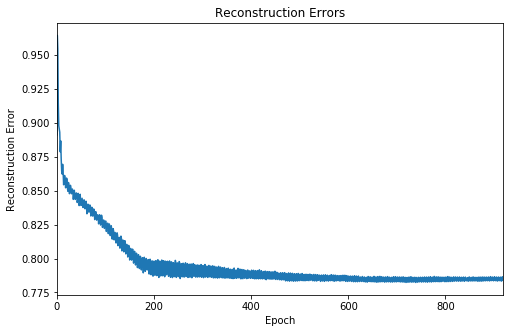

In [55]:
# Plot reconstruction errors

plt.figure(figsize=(8,5))
pd.Series(err).plot(logy=False)
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors')
plt.show()

In [65]:
# Predicting ratings for validation set

inputValidation = ratings_validation
inputValidation = inputValidation.astype(np.float32)

finalOutput_validation, reconstructedOutput_validation, _ = rbm.rbm_output(inputValidation)

# Calculating MSE for validation set

predictionsArray = reconstructedOutput_validation
pred_validation = predictionsArray[ratings_validation.nonzero()].flatten()
actual_validation = ratings_validation[ratings_validation.nonzero()].flatten()

rbm_prediction = mean_squared_error(pred_validation, actual_validation)

# Adding results to results dataframe
results = results.append({'Model': 'Restricted Boltzmann Machine', 'MSE': rbm_prediction}, ignore_index=True)

print('Mean squared error using RBM prediction:', round(rbm_prediction,2))

Mean squared error using RBM prediction: 12.14


### Recommendations for a mock user

In [66]:
#mock user id
user=187

# Getting recommended books for mock user
unread, read = rbm.recommendedBooks(reducedRatings, books, toread, rec, user)

# Listing recommended books for mock user
unread[['book_name','book_authors']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,book_name,book_authors
0,Nineteen Eighty-Four,"George Orwell, Erich Fromm, Celâl Üster"
1,The Notebook,Nicholas Sparks
2,A Thousand Splendid Suns,Khaled Hosseini
3,Un di Velt Hot Geshvign,"Elie Wiesel, Marion Wiesel"
4,Divine Secrets of the Ya-Ya Sisterhood,Rebecca Wells
5,Watchmen,"Alan Moore, Dave Gibbons, John Higgins"
6,Blink: The Power of Thinking Without Thinking,Malcolm Gladwell


## Results

In [67]:
results

,Model,MSE
0,Matrix Factorization,0.330581
1,Restricted Boltzmann Machine,12.144299


_________________________________________________________

By: Wendy Navarrete

November 2019